# Banking 77

In [1]:
import os
from collections import Counter

In [2]:
import pandas as pd

In [3]:
from leaderboard.utils import rasa_utils

In [4]:
import importlib
importlib.reload(rasa_utils)

<module 'leaderboard.utils.rasa_utils' from '/Users/kabu/Documents/workspace/rasa2/leaderboard/utils/rasa_utils.py'>

## Load Data

In [5]:
data_path = "../../../../training-data/public/Banking77"

In [6]:
!ls {data_path}

README.md  convert.py test       train


In [7]:
!head {data_path}/train/train.yml

version: "2.0"
nlu:
- intent: card_arrival
  examples: |
    - I am still waiting on my card?
    - What can I do if my card still hasn't arrived after 2 weeks?
    - I have been waiting over a week. Is the card still coming?
    - Can I track my card while it is in the process of delivery?
    - How do I know if I will get my card, or if it is lost?
    - When did you send me my new card?


In [8]:
data = {split: rasa_utils.load_nlu_data(os.path.join(data_path, split, f'{split}.yml')) for split in ['train', 'test']}

/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/Banking77/train/train.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.
/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/Banking77/test/test.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.


In [9]:
dfs = { 
    split: pd.DataFrame(
        [
            { 'text': message.get('text'), 
             'intent' : message.get('intent'), 
             'entities' : [entity['entity'] for entity in message.get('entities',[])],
            }
            for message in data[split].nlu_examples
        ]
    ) for split in data }

## Intents

In [10]:
for split, df in dfs.items():
    print(f'\n{split}\n' + '-'*20)
    display(df['intent'].describe())


train
--------------------


count                         9995
unique                          77
top       card_payment_fee_charged
freq                           187
Name: intent, dtype: object


test
--------------------


count             3077
unique              77
top       card_arrival
freq                40
Name: intent, dtype: object

<AxesSubplot:>

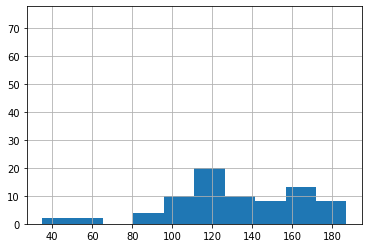

In [11]:
dfs['train']['intent'].value_counts().hist()
dfs['test']['intent'].value_counts().hist(color = "orange")

In [12]:
dfs['train']['intent'].value_counts(ascending=True)[:10]

contactless_not_working        35
virtual_card_not_working       41
card_acceptance                58
card_swallowed                 61
lost_or_stolen_card            82
atm_support                    85
compromised_card               86
receiving_money                95
top_up_limits                  97
get_disposable_virtual_card    97
Name: intent, dtype: int64

In [13]:
dfs['train']['intent'].value_counts(ascending=False)[:10]

card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
transaction_charged_twice                           175
declined_cash_withdrawal                            173
transfer_fee_charged                                172
transfer_not_received_by_recipient                  171
balance_not_updated_after_bank_transfer             171
Name: intent, dtype: int64

## Entities

### Entities per Message

In [14]:
for df in dfs.values():
    df['num_entities'] = df['entities'].apply(len)

<AxesSubplot:>

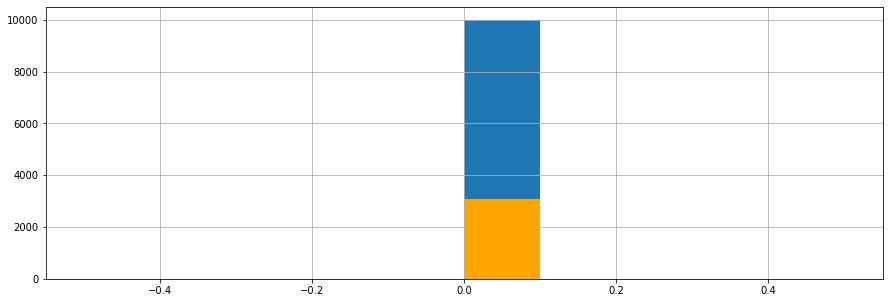

In [15]:
dfs['train']['num_entities'].hist(figsize=(15,5))
dfs['test']['num_entities'].hist(color = "orange")